In [6]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


200


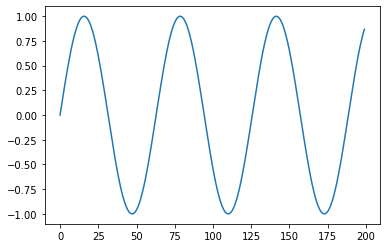

In [2]:
# make synthetic data
series = np.sin(0.1 * np.arange(200))

# optional add noise
# series = series + np.random.randn(200)*0.1
print(len(series))

# plot
plt.plot(series)
plt.show();

In [10]:
# build the dataset
T = 10 
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (190, 10, 1)  Y.shape:  (190,)


In [11]:
# autoregressive Linear Model
_input = Input(shape=(T, 1))
x = SimpleRNN(5, activation="relu")(_input)
x = Dense(1)(x)
model = Model(_input, x)

model.compile(
    loss="mse",
    optimizer=Adam(lr=0.1),
)

In [14]:
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2: ], Y[-N//2: ])
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 6ms/sample - loss: 0.2457 - val_loss: 0.1928
Epoch 2/80
95/95 [==============================] - 0s 177us/sample - loss: 0.1136 - val_loss: 0.0219
Epoch 3/80
95/95 [==============================] - 0s 184us/sample - loss: 0.0161 - val_loss: 0.0523
Epoch 4/80
95/95 [==============================] - 0s 187us/sample - loss: 0.0339 - val_loss: 0.0369
Epoch 5/80
95/95 [==============================] - 0s 175us/sample - loss: 0.0120 - val_loss: 0.0123
Epoch 6/80
95/95 [==============================] - 0s 178us/sample - loss: 0.0119 - val_loss: 0.0233
Epoch 7/80
95/95 [==============================] - 0s 180us/sample - loss: 0.0171 - val_loss: 0.0194
Epoch 8/80
95/95 [==============================] - 0s 178us/sample - loss: 0.0108 - val_loss: 0.0119
Epoch 9/80
95/95 [==============================] - 0s 180us/sample - loss: 0.0074 - val_loss: 0.0139
Epoch 10/80
95/95 [=====================

95/95 [==============================] - 0s 181us/sample - loss: 8.1938e-05 - val_loss: 1.1038e-04
Epoch 78/80
95/95 [==============================] - 0s 181us/sample - loss: 7.9664e-05 - val_loss: 1.1152e-04
Epoch 79/80
95/95 [==============================] - 0s 180us/sample - loss: 7.4601e-05 - val_loss: 1.1165e-04
Epoch 80/80
95/95 [==============================] - 0s 180us/sample - loss: 7.7198e-05 - val_loss: 1.0720e-04


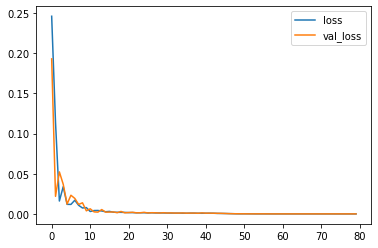

In [15]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();